## Car Price Prediction
###  Road Map
- 1. Task
- 2. Data
- 3. Modelling
- 4. Error Measurement
- 5. Training and optimization
- 6. Performance Measurement
- 7. Validation and Testing
- 8. Corrective Measure

### Task
- predict the price of task oon the basis of given features

In [1]:
## loading datset and importing a libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Normalization, Dense,InputLayer

In [2]:
df=pd.read_csv("./dataset/train.csv")
df.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


In [3]:
df.shape

(1000, 12)

### Data Preparation 

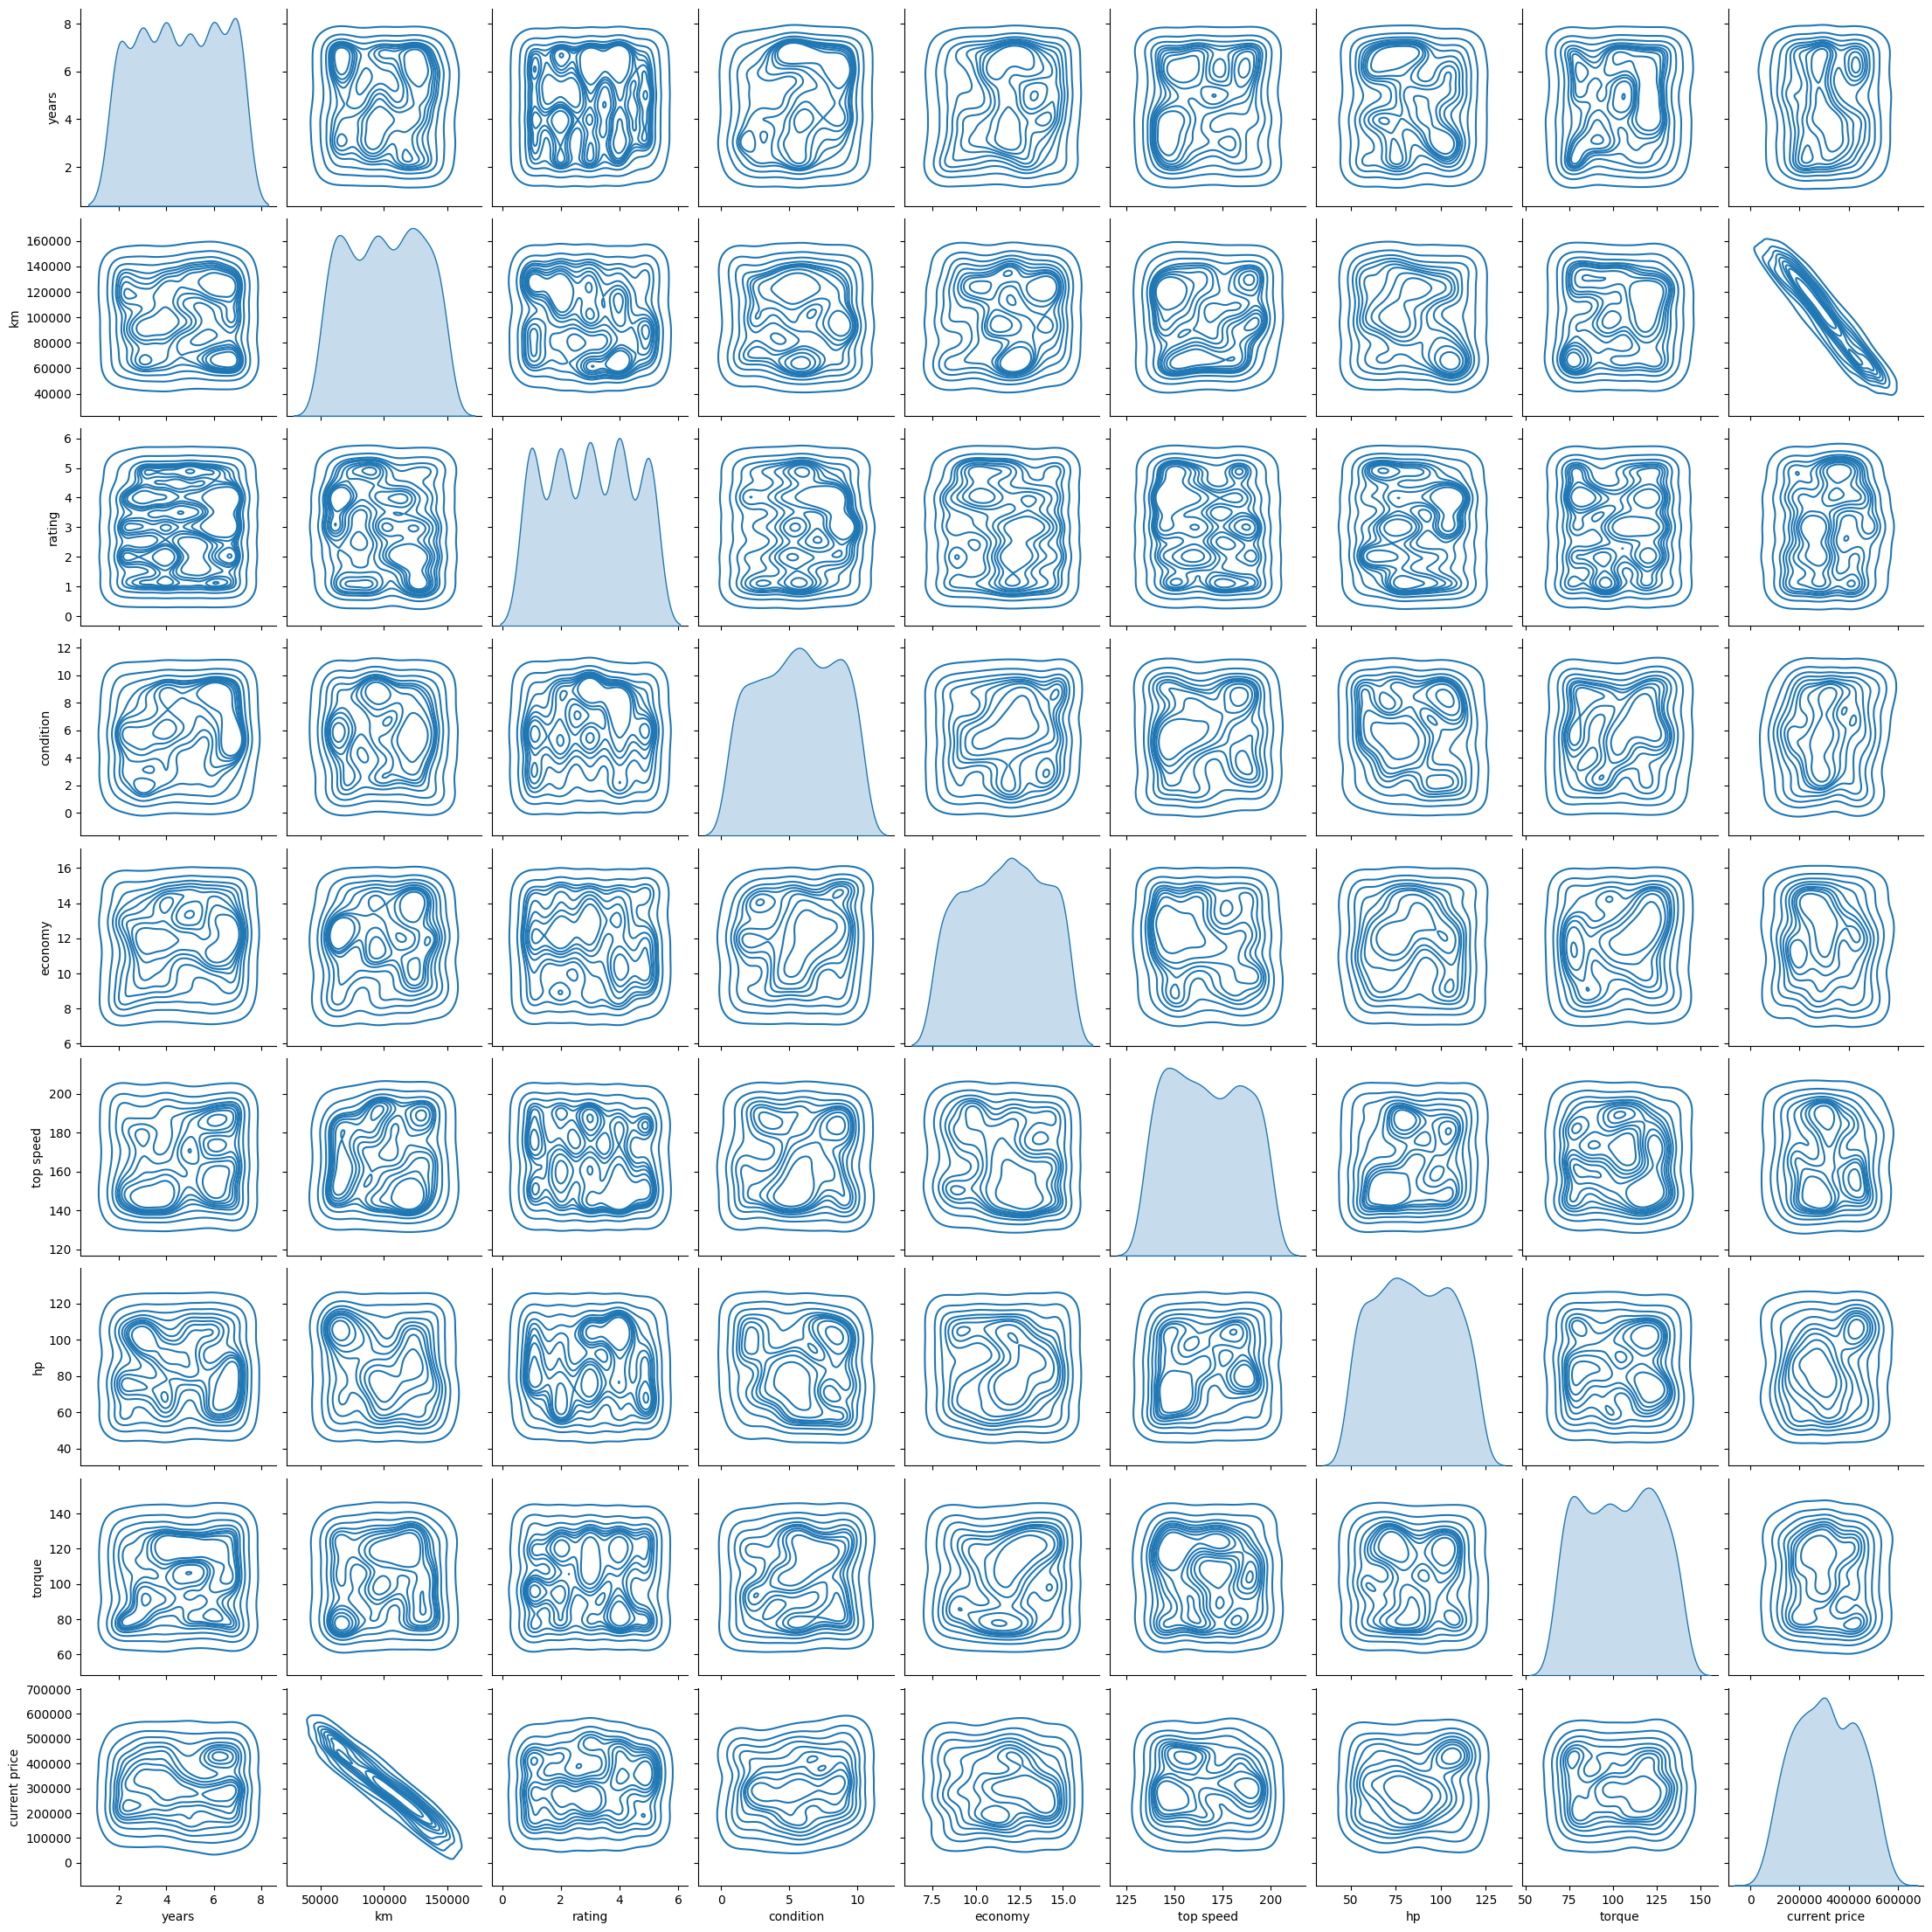

In [4]:
sns.pairplot(df[["years","km","rating","condition","economy","top speed","hp","torque","current price"]],kind='kde')

In [5]:
tensorData=tf.constant(df)
tensor_data=tf.cast(tensorData,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(1000, 12), dtype=float32, numpy=
array([[1.000000e+00, 5.356510e+05, 7.981860e+05, ..., 7.300000e+01,
        1.230000e+02, 3.513180e+05],
       [2.000000e+00, 5.919110e+05, 8.610560e+05, ..., 7.400000e+01,
        9.500000e+01, 2.850015e+05],
       [3.000000e+00, 6.869900e+05, 7.707620e+05, ..., 5.300000e+01,
        9.700000e+01, 2.153860e+05],
       ...,
       [9.980000e+02, 6.463440e+05, 8.427330e+05, ..., 1.130000e+02,
        8.900000e+01, 4.058710e+05],
       [9.990000e+02, 5.355590e+05, 7.324390e+05, ..., 1.120000e+02,
        1.280000e+02, 7.439800e+04],
       [1.000000e+03, 5.901050e+05, 7.797430e+05, ..., 9.900000e+01,
        9.600000e+01, 4.149385e+05]], dtype=float32)>

In [6]:
## Do shuffling to make sure there is no bias
tensor_data=tf.random.shuffle(tensor_data)
tensor_data[:5]

<tf.Tensor: shape=(5, 12), dtype=float32, numpy=
array([[1.250000e+02, 6.434950e+05, 8.006440e+05, 7.000000e+00,
        9.327000e+04, 2.000000e+00, 5.000000e+00, 1.200000e+01,
        1.920000e+02, 8.900000e+01, 1.000000e+02, 3.424270e+05],
       [9.660000e+02, 6.742740e+05, 8.778200e+05, 6.000000e+00,
        1.193560e+05, 2.000000e+00, 7.000000e+00, 1.300000e+01,
        1.940000e+02, 5.900000e+01, 1.070000e+02, 3.034190e+05],
       [9.400000e+02, 6.993220e+05, 7.235440e+05, 5.000000e+00,
        9.144400e+04, 4.000000e+00, 7.000000e+00, 1.100000e+01,
        1.530000e+02, 6.600000e+01, 1.140000e+02, 3.532370e+05],
       [2.750000e+02, 6.050170e+05, 8.356530e+05, 4.000000e+00,
        9.898000e+04, 4.000000e+00, 7.000000e+00, 1.300000e+01,
        1.460000e+02, 1.060000e+02, 1.250000e+02, 3.330915e+05],
       [7.670000e+02, 6.982840e+05, 7.632170e+05, 5.000000e+00,
        1.475990e+05, 5.000000e+00, 9.000000e+00, 1.200000e+01,
        1.630000e+02, 5.200000e+01, 9.200000e+01, 1

In [7]:
df.head(2)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5


In [8]:
X=tensor_data[:,3:-1]
Y=tensor_data[:,-1]

In [9]:
print(X.shape)
print(Y.shape)

(1000, 8)
(1000,)


In [10]:
Y=tf.expand_dims(Y,axis=-1)

## Perform Normalization
The normalized data is then used to train the model. The normalization process is done using the following formula 
(x-meu)/variance      :-standard deviation^2 = variance

In [11]:
# sample example
normalizer=Normalization()
x_normalizer=tf.constant([2,3,4,5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([2., 3., 4., 5.], dtype=float32)>

In [12]:
# sample example
normalizer = Normalization(mean=3, variance=2)
x_normalizer = tf.constant([2, 3, 4, 5])
normalizer(x_normalizer)

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([-0.70710677,  0.        ,  0.70710677,  1.4142135 ], dtype=float32)>

In [13]:
# sample example
normalizer = Normalization(axis=-1, mean=3, variance=2)
x_normalizer = tf.constant([[2, 3, 4, 5],[7,8,9,10]])
normalizer(x_normalizer)

<tf.Tensor: shape=(2, 4), dtype=float32, numpy=
array([[-0.70710677,  0.        ,  0.70710677,  1.4142135 ],
       [ 2.828427  ,  3.535534  ,  4.242641  ,  4.9497476 ]],
      dtype=float32)>

In [14]:
# Adapt normalizer to data without mean and variance it calculate for us
normalizer=Normalization()
normalizer.adapt(X) 

## Using Linear Regression Model

### Different ways to create model in tensorflow
- Sequential
- Functional
- Subclassing methods

In [15]:
model=tf.keras.Sequential([normalizer,
                           Dense(1)])  #we  have only one output price that is why we use 1 in dense
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_3 (Normalization) │ (1000, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 17 (72.00 B)

In [16]:

# Define the normalizer and adapt it to the input features
normalizer = Normalization()
normalizer.adapt(X)

# Define the model with explicit input shape
model = tf.keras.Sequential([
    # Explicitly define input shape
    tf.keras.layers.Input(shape=(X.shape[1],)),
    normalizer,
    Dense(1)  # Single output neuron
])

# Print model summary
model.summary()

# Now, plot the model
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ normalization_4 (Normalization) │ (None, 8)              │            17 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26 (108.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 17 (72.00 B)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [17]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.
